## 소개
- 경기 결과에 대한 포지션별 중요성 조사 내용
- 게임 당 포지션별로 평균 골드 차이를 계산하고 어떤 팀이 승리했는지 계산
- 게산 후 각 포지션별로 순위 계산
- 출처 : [A role's influence on the game.](https://www.kaggle.com/siriuscorp/a-role-s-influence-on-the-game)

In [1]:
library(ggplot2)
library(readr)

In [2]:
main <- read.csv('data/_LeagueofLegends.csv')

- 매 분마다 포지션에 대한 골드 차이를 추가하는 함수를 생성하여 게임에 대한 총 차이를 구한다.
- 레드팀 포지션 골드 - 블루팀 포지션 골드
- 이 값이 양수이면 레드팀이 많은것이고, 음수이면 블루팀이 많은것이다.

In [3]:
red <- vector("list", 3645)
blue <- vector("list", 3645)

#for red, function can be better abstracted but I don't have time.
for(i in 1:length(main$goldredTop)){
    y <- gsub("\\[|\\]", "", main$goldredTop[i])
    y <- gsub(" ","",y)
    numbers <- strsplit(y,',')
    numbers <- unlist(numbers)
    red[[i]] <- as.numeric(numbers)
}
   #for blue
   for(i in 1:length(main$goldblueTop)){
    y <- gsub("\\[|\\]", "", main$goldblueTop[i])
    y <- gsub(" ","",y)
    numbers <- strsplit(y,',')
    numbers <- unlist(numbers)
    blue[[i]] <- as.numeric(numbers)
}

mean(red[[2]] - blue[[2]])

[1] -423.7632

## 데이터 비교

In [4]:
RoleGoldDiff <- function(role){
       result<-numeric(length = 3645)
       red <- vector("list",3645)
      blue<- vector("list",3645)
   if(role == "top"){
 
   
    for(i in 1:length(main$goldredTop)){
        y <- gsub("\\[|\\]", "", main$goldredTop[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        red[[i]] <- as.numeric(numbers)
    }
       #for blue
       for(i in 1:length(main$goldblueTop)){
        y <- gsub("\\[|\\]", "", main$goldblueTop[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        blue[[i]] <- as.numeric(numbers)
    }
 
   }
    else if(role == "jun"){
 
     #for red, function can be better abstracted but I don't have time.
    for(i in 1:length(main$goldredJungle)){
        y <- gsub("\\[|\\]", "", main$goldredJungle[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        red[[i]] <- as.numeric(numbers)
    }
       #for blue
       for(i in 1:length(main$goldblueJungle)){
        y <- gsub("\\[|\\]", "", main$goldblueJungle[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        blue[[i]] <- as.numeric(numbers)
    }
  
   
   }
    else if(role == "mid"){
 
     #for red, function can be better abstracted but I don't have time.
    for(i in 1:length(main$goldredMiddle)){
        y <- gsub("\\[|\\]", "", main$goldredMiddle[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        red[[i]] <- as.numeric(numbers)
    }
       #for blue
       for(i in 1:length(main$goldblueMiddle)){
        y <- gsub("\\[|\\]", "", main$goldblueMiddle[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        blue[[i]] <- as.numeric(numbers)
    }
  

   }
    else if(role == "adc"){
 
     #for red, function can be better abstracted but I don't have time.
    for(i in 1:length(main$goldredADC)){
        y <- gsub("\\[|\\]", "", main$goldredADC[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        red[[i]] <- as.numeric(numbers)
    }
       #for blue
       for(i in 1:length(main$goldblueADC)){
        y <- gsub("\\[|\\]", "", main$goldblueADC[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        blue[[i]] <- as.numeric(numbers)
    }
  
  
   }
    else{
 
     #for red, function can be better abstracted but I don't have time.
    for(i in 1:length(main$goldredSupport)){
        y <- gsub("\\[|\\]", "", main$goldredSupport[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        red[[i]] <- as.numeric(numbers)
    }
       #for blue
       for(i in 1:length(main$goldblueSupport)){
        y <- gsub("\\[|\\]", "", main$goldblueSupport[i])
        y <- gsub(" ","",y)
        numbers <- strsplit(y,',')
        numbers <- unlist(numbers)
        blue[[i]] <- as.numeric(numbers)
    }
  
      
   }
    for(i in 1:length(result)){
          result[i] <- mean(red[[i]] - blue[[i]])
          }    
     result
}

In [5]:
main$TopAvg <- RoleGoldDiff(role='top')
main$JungleAvg <- RoleGoldDiff(role = 'jun')
main$MidAvg <- RoleGoldDiff(role='mid')
main$ADCAvg <- RoleGoldDiff(role='adc')
main$SupportAvg <- RoleGoldDiff(role = 'support')
main[1,]

MatchHistory,League,Season,Year,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,goldredADC,redSupportChamp,redSupport,goldredSupport,redBans,TopAvg,JungleAvg,MidAvg,ADCAvg,SupportAvg
http://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH1/30030?gameHash=fbb300951ad8327c,North_America,Spring_Season,2015,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]",...,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2287, 2621, 2976, 3222, 3634, 3787, 4149, 4459, 4829, 5185, 5810, 6374, 7000, 7423, 7857, 8114, 8399, 8684, 9045, 9205, 9987, 10291, 10937, 11438, 12162, 13041, 13318, 13508, 14049, 14369, 14758, 15256]",Thresh,LemonNation,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 1492, 1662, 1807, 1970, 2099, 2268, 2446, 2594, 2841, 2988, 3236, 3440, 3608, 3935, 4060, 4244, 4373, 4506, 4673, 4809, 5043, 5177, 5675, 5935, 6107, 6509, 6639, 6773, 6905, 7042, 7167, 7375]","['Tristana', 'Leblanc', 'Nidalee']",205.2,231.95,-1570.575,248.925,-476.425


In [6]:
games <- data.frame(winner = ifelse(main$bResult==1, "Blue", "Red"), TopAvg = main$TopAvg, JungleAvg = main$JungleAvg, MidAvg = main$MidAvg, ADCAvg = main$ADCAvg, SupportAvg = main$SupportAvg)

In [7]:
head(games)

winner,TopAvg,JungleAvg,MidAvg,ADCAvg,SupportAvg
Blue,205.2000,231.9500,-1570.57500,248.9250,-476.42500
Red,-423.7632,-767.8158,-91.39474,375.7105,-61.39474
Blue,-1035.4250,69.9500,-1101.85000,-1705.9000,-1163.85000
Red,-277.3171,548.0000,288.97561,-404.6585,581.36585
Blue,481.6571,243.7714,-396.80000,-1272.2000,-645.42857
Red,649.7917,190.3750,225.25000,296.2500,115.95833


각 포지션별 승리팀 추가 및 절대값 변환

In [8]:
games$TopWinningTeam <- ifelse(games$TopAvg > 0,"Red","Blue")
games$JungWinningTeam <- ifelse(games$JungleAvg > 0,"Red","Blue")
games$MidWinningTeam <- ifelse(games$MidAvg > 0,"Red","Blue")
games$ADCWinningTeam <- ifelse(games$ADCAvg > 0,"Red","Blue")
games$SupWinningTeam <- ifelse(games$SupportAvg > 0,"Red","Blue")

games$TopAvg <- abs(games$TopAvg)
games$JungleAvg <- abs(games$JungleAvg)
games$MidAvg <- abs(games$MidAvg)
games$ADCAvg <- abs(games$ADCAvg)
games$SupportAvg <- abs(games$SupportAvg)

캐리한 포지션 및 팀 column 생성

In [11]:
Carries <- vector("character", length=nrow(games))
CarryTeams <- vector("character", length=nrow(games))

# 포지션 별 carry 컬럼 분류
for(i in 1:nrow(games)) 
{
    TopValue <- games$TopAvg[i]
    JungValue <- games$JungleAvg[i]
    MidValue <- games$MidAvg[i]
    ADCValue <- games$ADCAvg[i]
    SupValue <- games$SupportAvg[i]
    
    RoleValues <- c(TopValue, JungValue, MidValue, ADCValue, SupValue)
    
    CarryGold <- max(RoleValues)
    
    if(CarryGold == TopValue){
        Carries[i] <- "Top"
        CarryTeams[i] <- games$TopWinningTeam[i]
    }
    else if(CarryGold == JungValue) {
        Carries[i] <- "Jungle"
        CarryTeams[i] <- games$JungWinningTeam[i]
    }
    else if(CarryGold == MidValue) {
        Carries[i] <- "Mid"
        CarryTeams[i] <- games$MidWinningTeam[i]
    }
    else if(CarryGold == ADCValue) {
        Carries[i] <- "ADC"
        CarryTeams[i] <- games$ADCWinningTeam[i]
    }
    else {
        Carries[i] <- "Support"
        CarryTeams[i] <- games$SupWinningTeam[i]
    }
}

games$Carry <- Carries
games$TeamOfCarry <- CarryTeams
head(games)

winner,TopAvg,JungleAvg,MidAvg,ADCAvg,SupportAvg,TopWinningTeam,JungWinningTeam,MidWinningTeam,ADCWinningTeam,SupWinningTeam,Carry,TeamOfCarry
Blue,205.2000,231.9500,1570.57500,248.9250,476.42500,Red,Red,Blue,Red,Blue,Mid,Blue
Red,423.7632,767.8158,91.39474,375.7105,61.39474,Blue,Blue,Blue,Red,Blue,Jungle,Blue
Blue,1035.4250,69.9500,1101.85000,1705.9000,1163.85000,Blue,Red,Blue,Blue,Blue,ADC,Blue
Red,277.3171,548.0000,288.97561,404.6585,581.36585,Blue,Red,Red,Blue,Red,Support,Red
Blue,481.6571,243.7714,396.80000,1272.2000,645.42857,Red,Red,Blue,Blue,Blue,ADC,Blue
Red,649.7917,190.3750,225.25000,296.2500,115.95833,Red,Red,Red,Red,Red,Top,Red


## 시각화

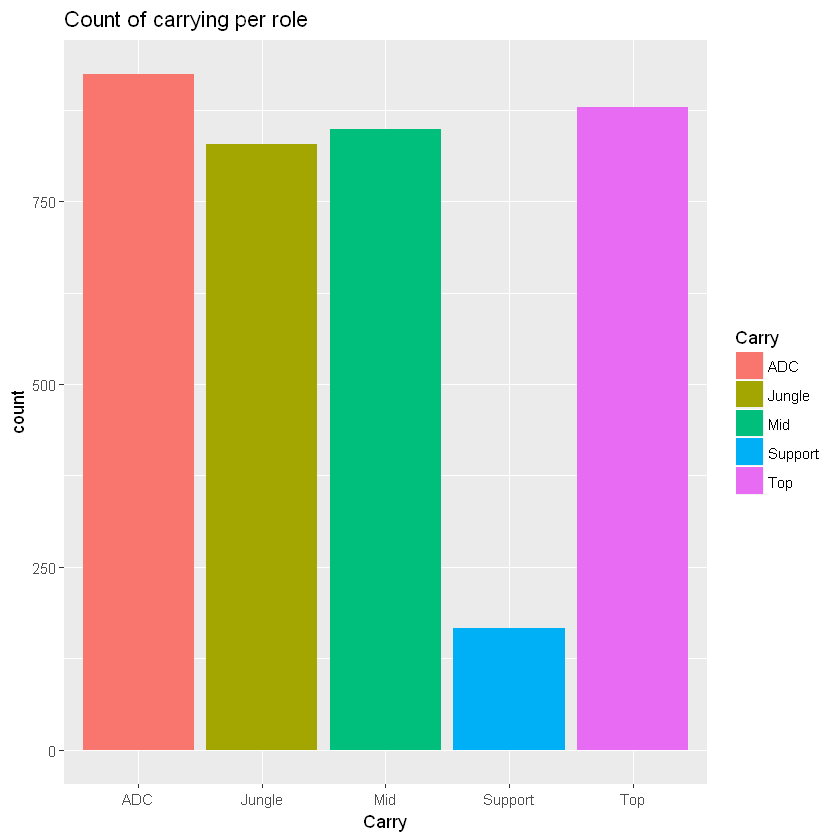

In [12]:
ggplot(data = games, aes(x=Carry, fill=Carry)) + geom_bar(stat="count") + ggtitle("Count of carrying per role")

In [16]:
head(WinningDF)

Winner,CarryTeam,Carry
Blue,Blue,Mid
Red,Blue,Jungle
Blue,Blue,ADC
Red,Red,Support
Blue,Blue,ADC
Red,Red,Top


Role,Winrate
Top,0.8350398
Jungle,0.8514493
Mid,0.8985849
ADC,0.9123377
Support,0.8373494


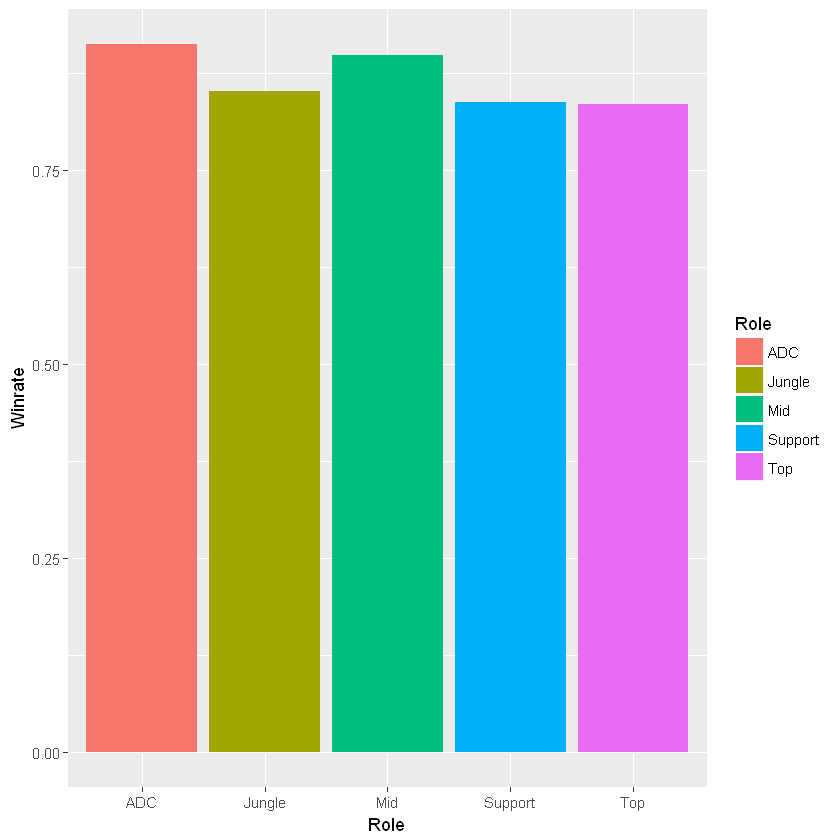

In [17]:
WinningDF <- data.frame(Winner=games$winner, CarryTeam=games$TeamOfCarry, Carry=games$Carry)

WinningDF$CarryWin <- ifelse(WinningDF$Winner == WinningDF$CarryTeam,1,0)

TopCarryWins <- nrow(WinningDF[WinningDF$Carry=="Top" & WinningDF$CarryWin==1,])/nrow(WinningDF[WinningDF$Carry=="Top",])
JunCarryWins <- nrow(WinningDF[WinningDF$Carry=="Jungle" & WinningDF$CarryWin==1,])/nrow(WinningDF[WinningDF$Carry=="Jungle",])
MidCarryWins <- nrow(WinningDF[WinningDF$Carry=="Mid" & WinningDF$CarryWin==1,])/nrow(WinningDF[WinningDF$Carry=="Mid",])
ADCCarryWins <- nrow(WinningDF[WinningDF$Carry=="ADC" & WinningDF$CarryWin==1,])/nrow(WinningDF[WinningDF$Carry=="ADC",])
SupCarryWins <- nrow(WinningDF[WinningDF$Carry=="Support" & WinningDF$CarryWin==1,])/nrow(WinningDF[WinningDF$Carry=="Support",])

#Create a data frame with the winrate of each role, when that specific role is the carry of the game.
CarryRoleWins <- data.frame(Role = c("Top","Jungle","Mid","ADC","Support"),
                          Winrate= c(TopCarryWins,JunCarryWins,MidCarryWins,ADCCarryWins,SupCarryWins))

ggplot(data=CarryRoleWins, aes(x=Role,y=Winrate,fill=Role)) + geom_bar(stat="identity")
CarryRoleWins

- 캐리할 때, 가장 많은 승리를 하는 포지션은 원딜이고 가장 적은 승리는 의외로 탑으로 나타났다. 
- 요즘 LCK를 봤을 때, 다 잘해야 하지만 탑이나 정글이 캐리하면 상위랭크에 오를 것 같지만 아무래도 딜의 주축이 원딜이기 때문에 원딜의 승률이 높은 것 같다.